In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_science_job.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [6]:
df.isnull().mean()*100
# we can't apply CCA(complete case analysis) having more than 5% missing values

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [7]:
df.shape

(19158, 13)

In [8]:
# Cols having less than 5% miss values 
cols=[var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [9]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
6914,0.920,no_enrollment,Graduate,10.0,50.0
11865,0.925,Full time course,Primary School,5.0,46.0
15860,0.910,no_enrollment,Masters,20.0,48.0
10505,0.910,no_enrollment,Graduate,7.0,29.0
3858,0.920,no_enrollment,Graduate,20.0,47.0


In [31]:
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [32]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [10]:
len(df)

19158

In [12]:
# %age of data left after droping the missing data
len(df[cols].dropna())/len(df)


0.8968577095730244

In [13]:
new_df=df[cols].dropna()

In [14]:
df.shape,new_df.shape

((19158, 13), (17182, 5))

In [15]:
new_df.sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
10434,0.920,Full time course,Graduate,7.0,17.0
2299,0.920,no_enrollment,Graduate,20.0,18.0
2817,0.698,Part time course,Graduate,7.0,55.0
10099,0.887,no_enrollment,Graduate,20.0,139.0
1852,0.920,no_enrollment,Phd,9.0,40.0


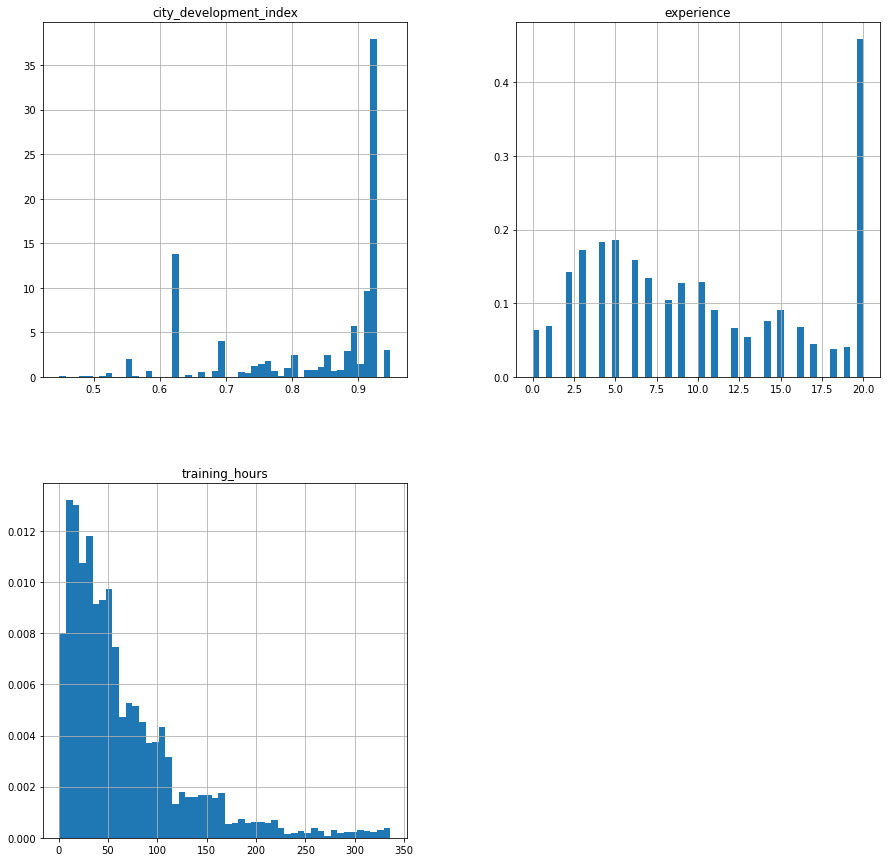

In [23]:
# hist after droping data
new_df.hist(bins=50,density=True,figsize=(15,15))
plt.show()

#### if the histo is comparable after applying cca and before applying cca ,then there is not any issue

<AxesSubplot:>

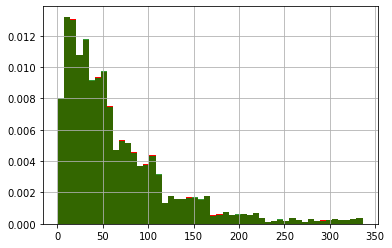

In [25]:
fig=plt.figure()
ax=fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50,ax=ax,density=True ,color='red')

# data after cca, the argument alpha makes color transparent so we 
# see the overlay of the 2 distribution

new_df['training_hours'].hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)

<AxesSubplot:ylabel='Density'>

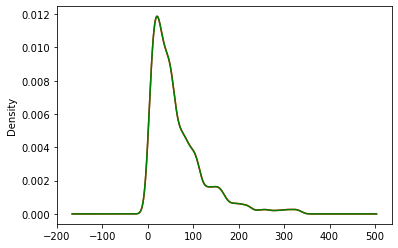

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

<AxesSubplot:>

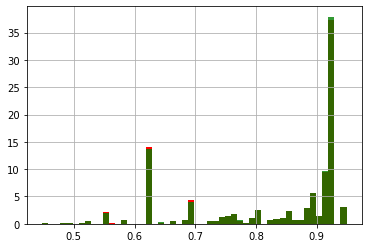

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

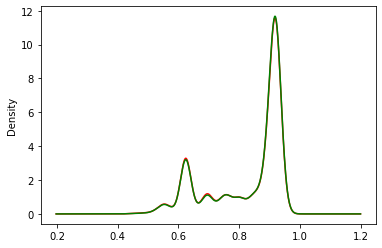

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')


<AxesSubplot:>

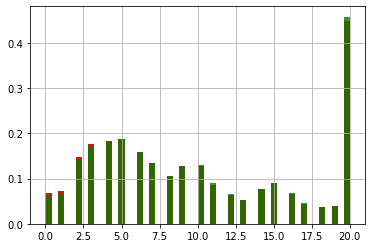

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)


<AxesSubplot:ylabel='Density'>

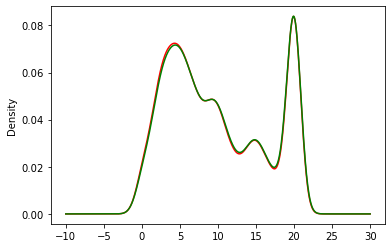

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

In [36]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [37]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
